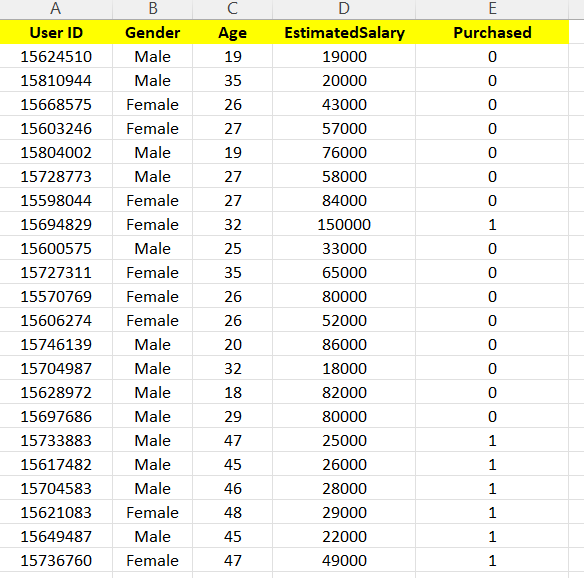

Independent attributes data:      Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]
Dependent attributes data: 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64
Confusion matrix:
 [[63  5]
 [ 8 24]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        68
           1       0.83      0.75      0.79        32

    accuracy                           0.87       100
   macro avg       0.86      0.84      0.85       100
weighted avg       0.87      0.87      0.87       100

Logistic Regression Model Score:
 0.87


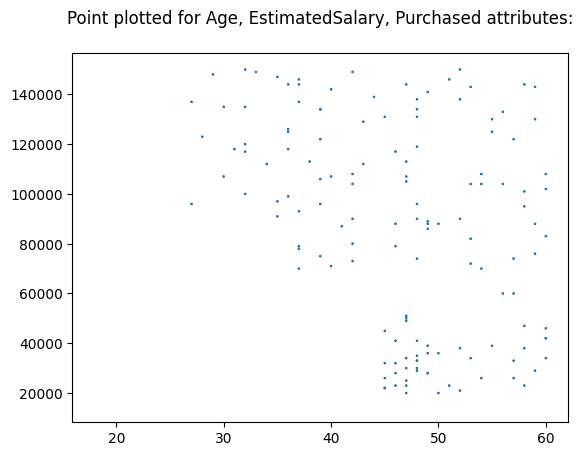

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# reading data
df = pd.read_csv('/content/Social_Network_Ads.csv')

# selection row and columns
x = df.iloc[:, 2:4]
y = df.iloc[:, 4]
print('Independent attributes data:', x)
print('Dependent attributes data:', y)

# plotting point for different attributes
# plt.scatter(df.Gender, df.Age, df.EstimatedSalary, df.Purchased)
plt.scatter(df.Age, df.EstimatedSalary, df.Purchased, marker='*')
# plt.scatter(df.EstimatedSalary, df.Purchased, marker='+', color='red')
plt.title('Point plotted for Age, EstimatedSalary, Purchased attributes:\n')

# Split dataset into Train set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Feature Scaling StandardScaler class
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# ss.fit(x_train)
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Confusion Matrix production
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

# Recall precision F1-factor calculation
# F1 = 2 * (precision * recall) / (precision + recall)
print('Classification report:\n', classification_report(y_test, y_pred))
print('Logistic Regression Model Score:\n', model.score(x_test, y_test))

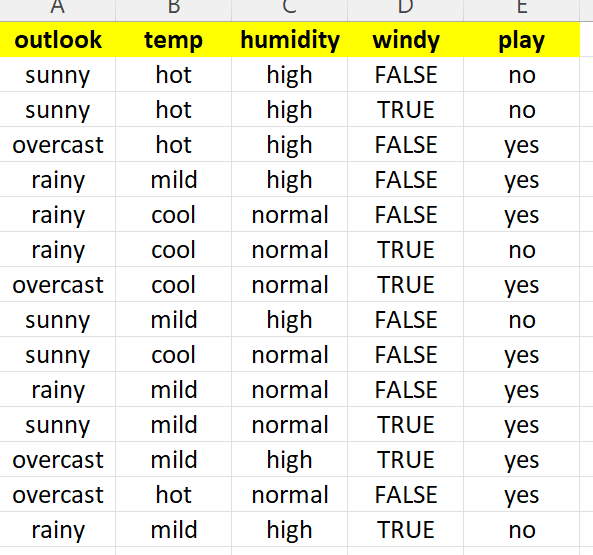

Data=
     out  tmp  hum  wnd  cls
0     2    1    0    0    0
1     2    1    0    1    0
2     0    1    0    0    1
3     1    2    0    0    1
4     1    0    1    0    1
5     1    0    1    1    0
6     0    0    1    1    1
7     2    2    0    0    0
8     2    0    1    0    1
9     1    2    1    0    1
10    2    2    1    1    1
11    0    2    0    1    1
12    0    1    1    0    1
13    1    2    0    1    0
Input=
     out  tmp  hum  wnd
0     2    1    0    0
1     2    1    0    1
2     0    1    0    0
3     1    2    0    0
4     1    0    1    0
5     1    0    1    1
6     0    0    1    1
7     2    2    0    0
8     2    0    1    0
9     1    2    1    0
10    2    2    1    1
11    0    2    0    1
12    0    1    1    0
13    1    2    0    1
Output=
 0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: cls, dtype: int64
Modelscore= 1.0


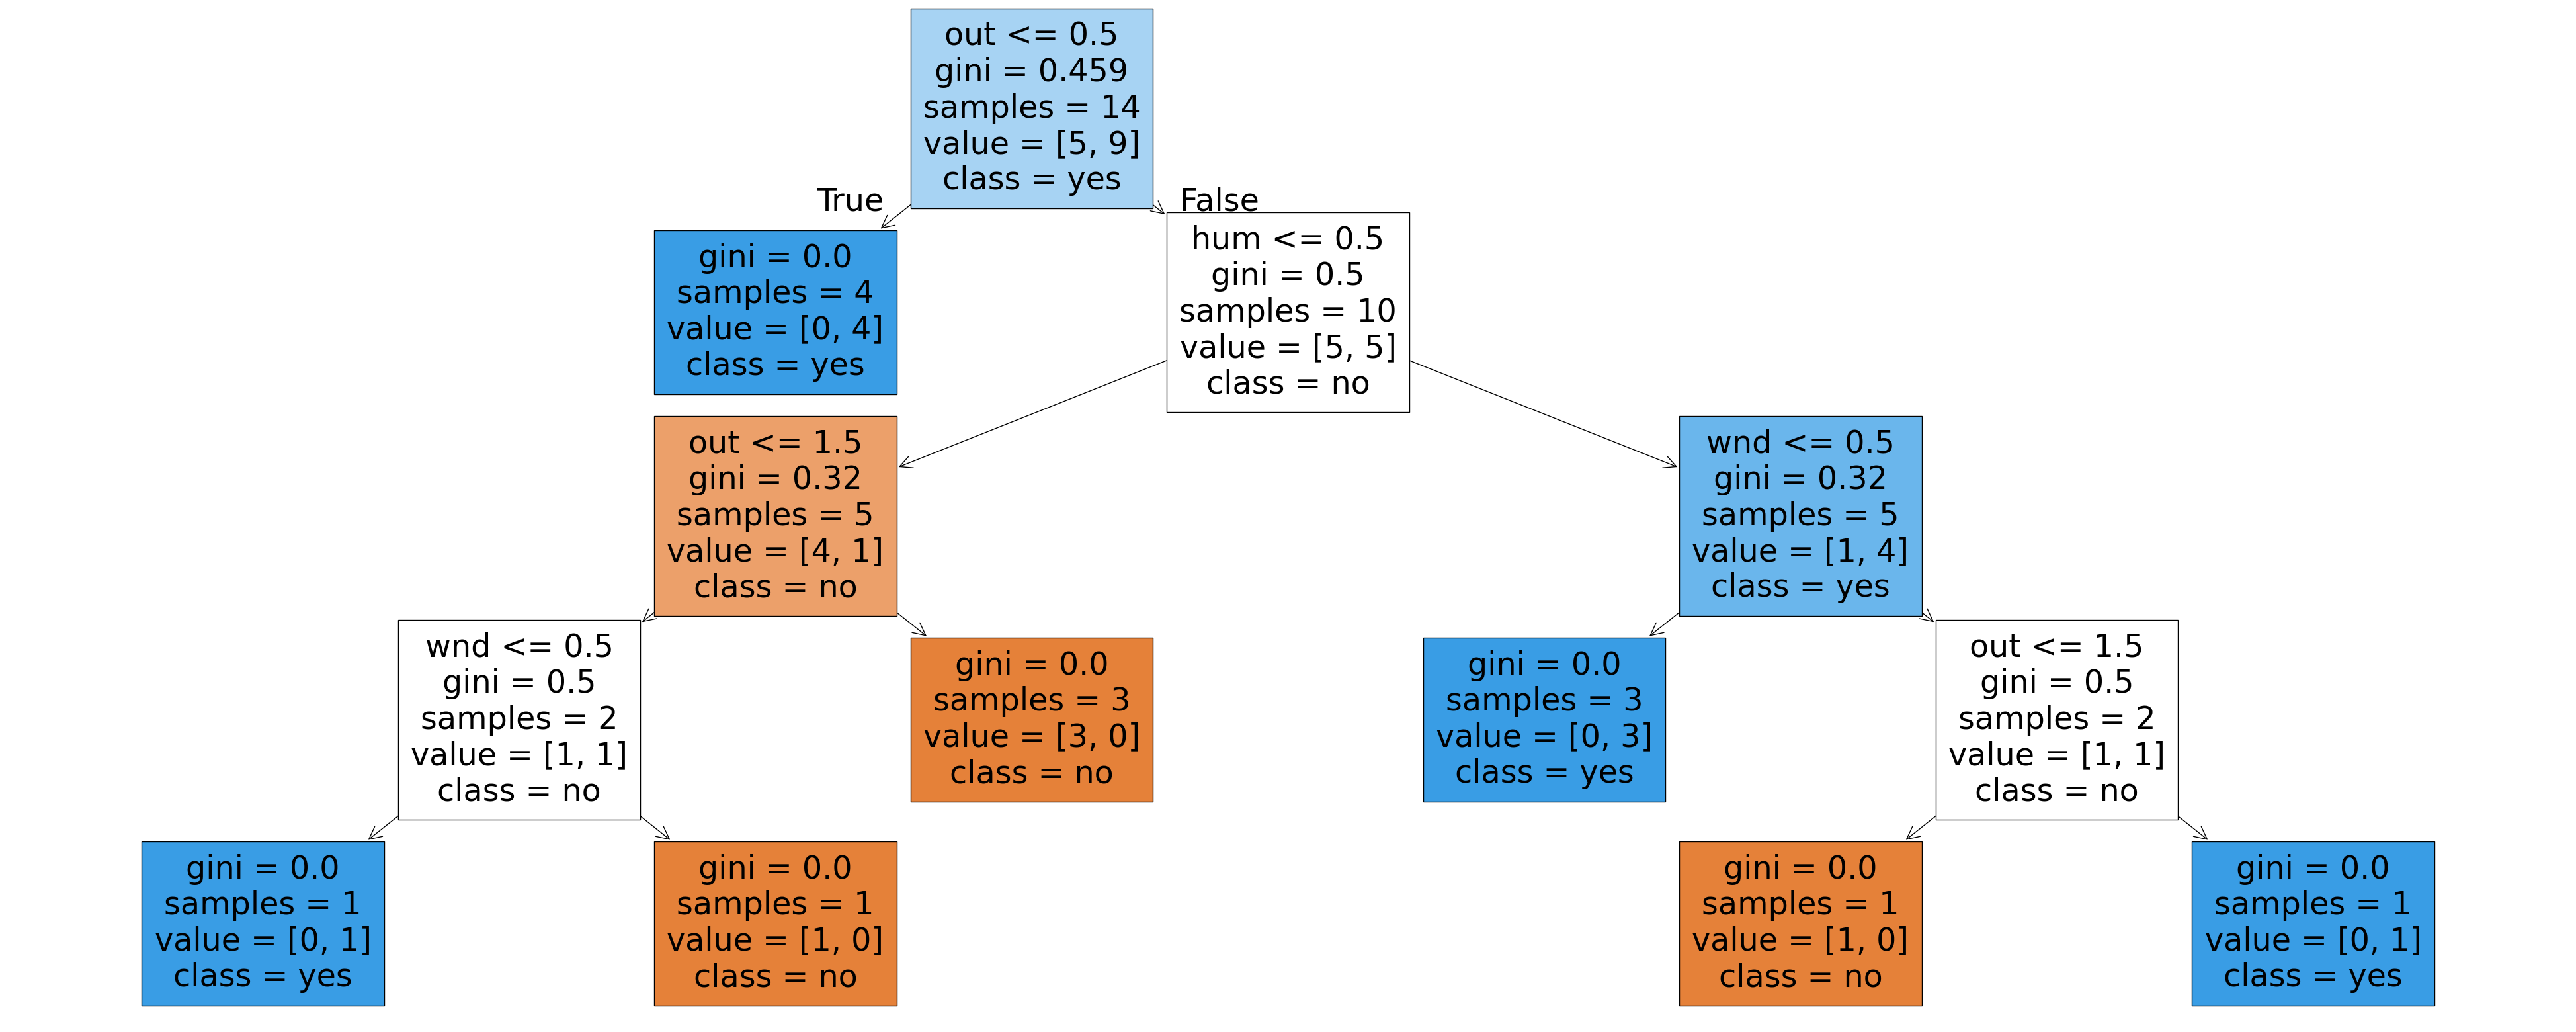

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/tennis.csv')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['out'] = le.fit_transform(df['outlook'])
df['tmp'] = le.fit_transform(df['temp'])
df['hum'] = le.fit_transform(df['humidity'])
df['wnd'] = le.fit_transform(df['windy'])
df['cls'] = le.fit_transform(df['play'])

df = df.drop(['outlook', 'temp', 'humidity', 'windy', 'play'], axis='columns')
in_var = df.drop('cls', axis='columns')
x = in_var
dp_var = df['cls']
y = dp_var

print("Data=\n", df)
print("Input=\n", in_var)
print("Output=\n", dp_var)

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = tree.DecisionTreeClassifier()
model.fit(in_var, dp_var)

Mscore = model.score(in_var, dp_var)
print("Modelscore=", Mscore)
# model.predict([[1,0,1,0]])

plt.figure(figsize=(50, 20))
plot_tree(model, filled=True, feature_names=df.columns, class_names=le.classes_)
plt.show()

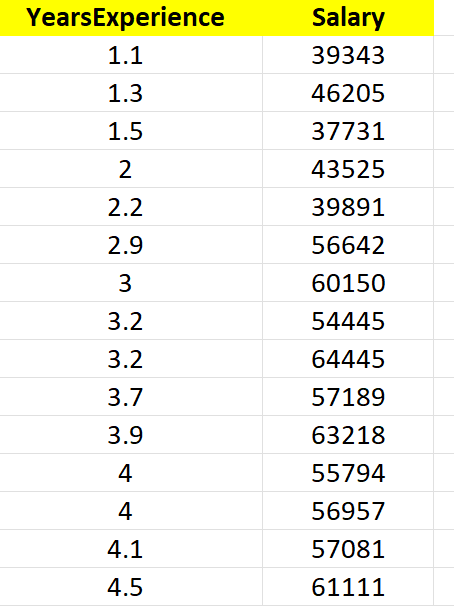

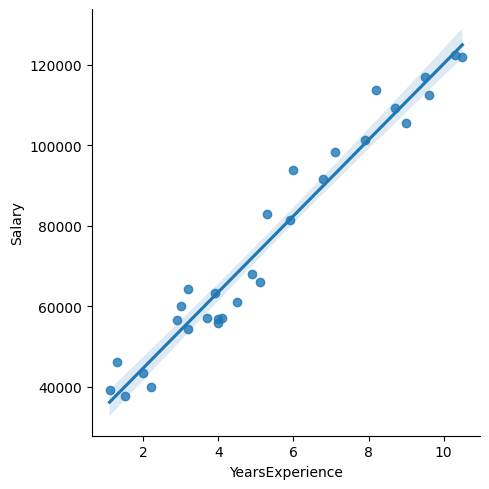

In [4]:
# LINEAR REGRESSION
import numpy as np
import pandas as pd
import seaborn as sns

# Seaborn is a library for making statistical graphics in Python.
from sklearn import linear_model
df = pd.read_csv('/content/Salary_Data.csv')
sns.lmplot(x='YearsExperience', y='Salary', data=df)

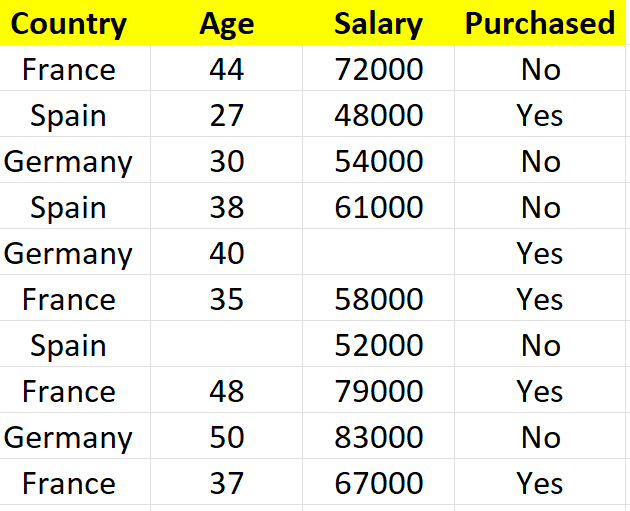

In [5]:
import numpy as np   # import NumPy library into current program.
import matplotlib.pyplot as plt   # bring pyplot module from matplotlib library
import pandas as pd   # Pandas library for data manipulation and analysis, for tabular data.

dataset = pd.read_csv('/content/Data1.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
print(X)
print(Y)

# Handling missing data with SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
print(X)

# One Hot Encoding
from sklearn.compose import ColumnTransformer  # ColumnTransformer allows a OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[:, 0:3])

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
[[1.0 0.0 0.0]
 [0.0 0.0 1.0]
 [0.0 1.0 0.0]
 [0.0 0.0 1.0]
 [0.0 1.0 0.0]
 [1.0 0.0 0.0]
 [0.0 0.0 1.0]
 [1.0 0.0 0.0]
 [0.0 1.0 0.0]
 [1.0 0.0 0.0]]
